In [1]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CW308_STM32F4'
SS_VER = 'SS_VER_1_1'

In [2]:
%run "../jupyter/Setup_Scripts/Setup_Generic.ipynb"

INFO: Found ChipWhisperer😍


In [4]:
%%bash -s "$PLATFORM" "$SS_VER"
cd ../tracescapture/2024dilithium
make PLATFORM=$1 CRYPTO_TARGET=NONE SS_VER=$2

SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (15:10.3-2021.07-4) 10.3.1 20210621 (release)
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling:
-en     main.c ...
-e Done!
.
Compiling:
-en     sign.c ...
-e Done!
.
Compiling:
-en     packing.c ...
-e Done!
.
Compiling:
-en     polyvec.c ...
-e Done!
.
Compiling:
-en     poly.c ...
-e Done!
.
Compiling:
-en     ntt.c ...
-e Done!
.
Compiling:
-en     reduce.c ...
-e Done!
.
Compiling:
-en     rounding.c ...
-e Done!
.
Compiling:
-en     fips202.c ...
-e Done!
.
Compiling:
-en     symmetric-shake.c ...
-e Done!
.
Compiling:
-en     aes256ctr.c ...
-e Done!
.
Compiling:


In file included from ../../hardware/victims/firmware/./hal/stm32f4/stm32f4_hal.c:3:
../../hardware/victims/firmware/./hal/stm32f4/stm32f4_hal_lowlevel.h:108: warning: "STM32F415xx" redefined
  108 | #define STM32F415xx
      | 
<command-line>: note: this is the location of the previous definition


-e Done!
.
Compiling:
-en     ../../hardware/victims/firmware/./hal/stm32f4/stm32f4_hal_lowlevel.c ...


In file included from ../../hardware/victims/firmware/./hal/stm32f4/stm32f4_hal_lowlevel.c:39:
../../hardware/victims/firmware/./hal/stm32f4/stm32f4_hal_lowlevel.h:108: warning: "STM32F415xx" redefined
  108 | #define STM32F415xx
      | 
<command-line>: note: this is the location of the previous definition


-e Done!
.
Compiling:
-en     ../../hardware/victims/firmware/./hal/stm32f4/stm32f4_sysmem.c ...
-e Done!
.
Compiling:
-en     ../../hardware/victims/firmware/./hal/stm32f4/stm32f4xx_hal_rng.c ...
-e Done!
.
Assembling: ../../hardware/victims/firmware/./hal/stm32f4/stm32f4_startup.S
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -DF_CPU=7372800 -Wa,-gstabs,-adhlns=objdir-CW308_STM32F4/stm32f4_startup.lst -I../../hardware/victims/firmware/./simpleserial/ -I../../hardware/victims/firmware/./simpleserial/ -I../../hardware/victims/firmware/./hal -I../../hardware/victims/firmware/./hal/stm32f4 -I../../hardware/victims/firmware/./hal/stm32f4/CMSIS -I../../hardware/victims/firmware/./hal/stm32f4/CMSIS/core -I../../hardware/victims/firmware/./hal/stm32f4/CMSIS/device -I../../hardware/victims/firmware/./hal/stm32f4/Legacy -I../../hardware/victims/firmware/./crypto/ ../../hardware/victims/firmware/./hal/stm32f4/stm32

In [5]:
cw.program_target(scope, prog, "../tracescapture/2024dilithium/simple-test-{}.hex".format(PLATFORM))

Detected known STMF32: STM32F40xxx/41xxx
Extended erase (0x44), this can take ten seconds or more
Attempting to program 37423 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 37423 bytes


In [6]:
import ctypes

from picosdk.ps5000a import ps5000a as ps
import matplotlib.pyplot as plt
from picosdk.functions import adc2mV, assert_pico_ok, mV2adc

# Create chandle and status ready for use
chandle = ctypes.c_int16()
status = {}

# Open 5000 series PicoScope
# Resolution set to 12 Bit
# 设置示波器的BIT，默认为12BIT
resolution =ps.PS5000A_DEVICE_RESOLUTION["PS5000A_DR_12BIT"]
# Returns handle to chandle for use in future API functions
status["openunit"] = ps.ps5000aOpenUnit(ctypes.byref(chandle), None, resolution)

try:
    assert_pico_ok(status["openunit"])
except: # PicoNotOkError:
    powerStatus = status["openunit"]
    if powerStatus == 286:
        status["changePowerSource"] = ps.ps5000aChangePowerSource(chandle, powerStatus)
    elif powerStatus == 282:
        status["changePowerSource"] = ps.ps5000aChangePowerSource(chandle, powerStatus)
    else:
        raise
    assert_pico_ok(status["changePowerSource"])

In [11]:
# Set up channel A
# handle = chandle

channel = ps.PS5000A_CHANNEL["PS5000A_CHANNEL_A"]
# enabled = 1
coupling_type = ps.PS5000A_COUPLING["PS5000A_DC"]
chARange = ps.PS5000A_RANGE["PS5000A_20V"]
# analogue offset = 0 V
status["setChA"] = ps.ps5000aSetChannel(chandle, channel, 1, coupling_type, chARange, 0)
assert_pico_ok(status["setChA"])

# Set up channel B
# handle = chandle
channel = ps.PS5000A_CHANNEL["PS5000A_CHANNEL_B"]
# enabled = 1

coupling_type2 = ps.PS5000A_COUPLING["PS5000A_AC"]
#chBRange = ps.PS5000A_RANGE["PS5000A_2V"]
chBRange = ps.PS5000A_RANGE["PS5000A_50MV"]
# analogue offset = 0 V
status["setChB"] = ps.ps5000aSetChannel(chandle, channel, 1, coupling_type2, chBRange, 0)
assert_pico_ok(status["setChB"])

# find maximum ADC count value
# handle = chandle
# pointer to value = ctypes.byref(maxADC)
maxADC = ctypes.c_int16()
status["maximumValue"] = ps.ps5000aMaximumValue(chandle, ctypes.byref(maxADC))
assert_pico_ok(status["maximumValue"])

# Set up single trigger
# handle = chandle
# enabled = 1
source = ps.PS5000A_CHANNEL["PS5000A_CHANNEL_A"]
threshold = int(mV2adc(300,chARange, maxADC))
# direction = PS5000A_RISING = 2
# delay = 0 s
# auto Trigger = 1000 ms
#status["trigger"] = ps.ps5000aSetSimpleTrigger(chandle, 1, source, threshold, 2, 0, 1000)
status["trigger"] = ps.ps5000aSetSimpleTrigger(chandle, 1, source, threshold, 2, 0, 0)

assert_pico_ok(status["trigger"])


# Set number of pre and post trigger samples to be collected
#####################参数###############################################
preTriggerSamples = 0

# postTriggerSamples = 46000
postTriggerSamples = 10000
#####################################################################
maxSamples = preTriggerSamples + postTriggerSamples

# Get timebase information
# Warning: When using this example it may not be possible to access all Timebases as all channels are enabled by default when opening the scope.  
# To access these Timebases, set any unused analogue channels to off.
# handle = chandle

#####################参数#############################
#timebase = 8
timebase = 8
######################################################
#timebase = 8  , 20.8 MHZ
# noSamples = maxSamples
# pointer to timeIntervalNanoseconds = ctypes.byref(timeIntervalns)
# pointer to maxSamples = ctypes.byref(returnedMaxSamples)
# segment index = 0
timeIntervalns = ctypes.c_float()
returnedMaxSamples = ctypes.c_int32()
status["getTimebase2"] = ps.ps5000aGetTimebase2(chandle, timebase, maxSamples, ctypes.byref(timeIntervalns), ctypes.byref(returnedMaxSamples), 0)
assert_pico_ok(status["getTimebase2"])

In [8]:
%matplotlib notebook
import matplotlib.pylab as plt
import random

def convert_msg(m,length):
    res = []
    for j in range(0,length): 
        s = m[j*2:j*2+2]
        s = "0x" + s
        res.append(int(s,16))
        #print(s,end=',')
    
    return res

print(convert_msg("92abc33288e254a195bb5acd57330ae32d86da6c66c0740f3f846785ad8e8815",32))

[146, 171, 195, 50, 136, 226, 84, 161, 149, 187, 90, 205, 87, 51, 10, 227, 45, 134, 218, 108, 102, 192, 116, 15, 63, 132, 103, 133, 173, 142, 136, 21]


In [ ]:
import os
import random
import string

def generate_random_hex_string(length):
    return ''.join([format(random.randint(0, 15), 'x') for _ in range(length)])

def write_random_hex_strings_to_file(file_path, count):
    with open(file_path, 'w') as output_file:
        for _ in range(count):
            random_hex_string = generate_random_hex_string(64)  # 因为两位十六进制代表一位字节，所以长度除以2
            output_file.write(f"{random_hex_string}\n")

# 使用示例
output_file_name = r"D:\DCPA\mf.txt"
write_random_hex_strings_to_file(output_file_name, 10000)

print(f"已成功在'{output_file_name}'文件中生成了{10000}个32byte长度的随机字符串。")

In [9]:
def read_hex_strings_from_file(file_path):
    with open(file_path, 'r') as input_file:
        hex_strings = [line.strip() for line in input_file]
    return hex_strings

# 使用示例
input_file_name = r"D:\DCPA\mf.txt"
hex_list = read_hex_strings_from_file(input_file_name)

In [13]:
from tqdm import tnrange
from tqdm.auto import tqdm
import gc
import numpy as np

traces_per_part = 200  # 每一块文件多少条曲线
part = 1  # 分成多少块文件
part_start_index = 0  # 序号从多少块开始。如果是初始采集，就设置为0


filename_of_traces = r"D:\DCPA\trace\TVLA\Random"	# 曲线文件的文件名前缀
#infile = open(r"D:\Demonstrate\Dilithium\train\test.txt")
#infile = open(r"D:\DCPA\pre_file\test.txt")
total_traces = part * traces_per_part  # 总共要采集的曲线数目
error_list = []

def mainProcess(num_of_traces):

    traces_array = np.empty(shape=(traces_per_part,maxSamples),dtype=np.float64)
    text_in_array = hex_list
    text_out_array = []

    for index_i in tnrange(num_of_traces):
        reset_target(scope)
        
        msg = convert_msg(hex_list[index_i],32)

        target.simpleserial_write('p',bytearray(msg))
        
        status["runBlock"] = ps.ps5000aRunBlock(chandle, preTriggerSamples, postTriggerSamples, timebase, None, 0, None, None)
        assert_pico_ok(status["runBlock"])
        
        ready = ctypes.c_int16(0)
        check = ctypes.c_int16(0)
        while ready.value == check.value:
            status["isReady"] = ps.ps5000aIsReady(chandle, ctypes.byref(ready))
        
        bufferAMax = (ctypes.c_int16 * maxSamples)()
        bufferAMin = (ctypes.c_int16 * maxSamples)() 
        bufferBMax = (ctypes.c_int16 * maxSamples)()
        bufferBMin = (ctypes.c_int16 * maxSamples)()
        source = ps.PS5000A_CHANNEL["PS5000A_CHANNEL_A"]
        status["setDataBuffersA"] = ps.ps5000aSetDataBuffers(chandle, source, ctypes.byref(bufferAMax), ctypes.byref(bufferAMin), maxSamples, 0, 0)
        assert_pico_ok(status["setDataBuffersA"])
        source = ps.PS5000A_CHANNEL["PS5000A_CHANNEL_B"]
        status["setDataBuffersB"] = ps.ps5000aSetDataBuffers(chandle, source, ctypes.byref(bufferBMax), ctypes.byref(bufferBMin), maxSamples, 0, 0)
        assert_pico_ok(status["setDataBuffersB"])
        overflow = ctypes.c_int16()
        cmaxSamples = ctypes.c_int32(maxSamples)
        
        status["getValues"] = ps.ps5000aGetValues(chandle, 0, ctypes.byref(cmaxSamples), 0, 0, 0, ctypes.byref(overflow))
        assert_pico_ok(status["getValues"])
        adc2mVChAMax =  adc2mV(bufferAMax, chARange, maxADC)
        adc2mVChBMax =  adc2mV(bufferBMax, chBRange, maxADC)
        
        if adc2mVChBMax[0] == 32512 and adc2mVChBMax[-1] == 32512:
            raise Exception('示波器采集错误，请重新采集')
        
        #plt.plot(adc2mVChAMax[:])
        traces_array[index_i] = np.array(adc2mVChBMax[:])
        
        c_tilde = target.simpleserial_read('r',32,timeout = 0)
        text_out_array.append(np.array(c_tilde))
        
    return traces_array, text_in_array, text_out_array

for p in tnrange(part):  # 遍历所有的part
    traces_arr, text_in_arr, text_out_arr = mainProcess(traces_per_part)
    np.save(filename_of_traces + "_part{0}.npy".format(p + part_start_index), traces_arr)
    np.save(filename_of_traces + "_part{0}_c.npy".format(p + part_start_index), text_out_arr)

C:\Users\admin\AppData\Local\Temp\ipykernel_28300\311070249.py:67: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for p in tnrange(part):  # 遍历所有的part


  0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\admin\AppData\Local\Temp\ipykernel_28300\311070249.py:23: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for index_i in tnrange(num_of_traces):


  0%|          | 0/200 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


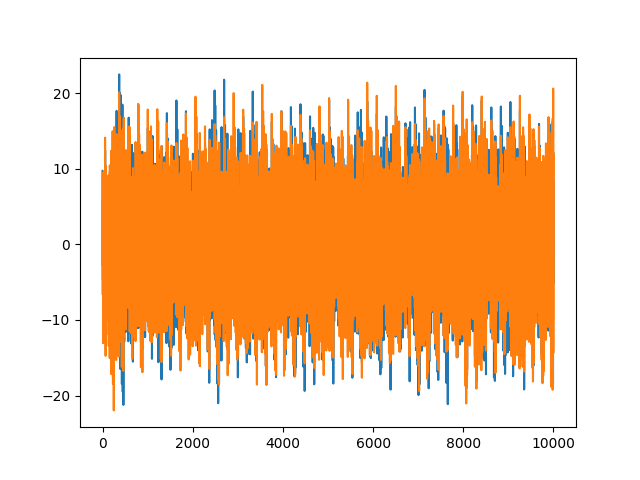

In [14]:
plt.plot(traces_arr[0])
plt.plot(traces_arr[1])

In [15]:
def revert_msg(res):
    m = ""
    for value in res:
        hex_str = format(value, '02x')
        m += hex_str
    return m

In [16]:
print(revert_msg(text_out_arr[0]))
print(convert_msg("a012e309aa1fecb49f73ad69c3f763bf9afc1f41c862c7be13c4904989b0b8ce",32))

b327431cfbdd3948a7f0709abc17740a86ae7814a6f21b8c6d0b1d64ec6a0c03
[160, 18, 227, 9, 170, 31, 236, 180, 159, 115, 173, 105, 195, 247, 99, 191, 154, 252, 31, 65, 200, 98, 199, 190, 19, 196, 144, 73, 137, 176, 184, 206]


In [17]:
gc.collect()

526

In [18]:
# Stop the scope
# handle = chandle
status["stop"] = ps.ps5000aStop(chandle)
assert_pico_ok(status["stop"])

# Close unit Disconnect the scope
# handle = chandle
status["close"]=ps.ps5000aCloseUnit(chandle)
assert_pico_ok(status["close"])

# display status returns
print(status)

{'openunit': 0, 'setChA': 0, 'setChB': 0, 'maximumValue': 0, 'trigger': 0, 'getTimebase2': 0, 'runBlock': 0, 'isReady': 0, 'setDataBuffersA': 0, 'setDataBuffersB': 0, 'getValues': 0, 'stop': 0, 'close': 0}


In [19]:
import ctypes

from picosdk.ps5000a import ps5000a as ps
import matplotlib.pyplot as plt
from picosdk.functions import adc2mV, assert_pico_ok, mV2adc

# Create chandle and status ready for use
chandle = ctypes.c_int16()
status = {}

# Open 5000 series PicoScope
# Resolution set to 12 Bit
# 设置示波器的BIT，默认为12BIT
resolution =ps.PS5000A_DEVICE_RESOLUTION["PS5000A_DR_12BIT"]
# Returns handle to chandle for use in future API functions
status["openunit"] = ps.ps5000aOpenUnit(ctypes.byref(chandle), None, resolution)

try:
    assert_pico_ok(status["openunit"])
except: # PicoNotOkError:
    powerStatus = status["openunit"]
    if powerStatus == 286:
        status["changePowerSource"] = ps.ps5000aChangePowerSource(chandle, powerStatus)
    elif powerStatus == 282:
        status["changePowerSource"] = ps.ps5000aChangePowerSource(chandle, powerStatus)
    else:
        raise
    assert_pico_ok(status["changePowerSource"])

In [20]:
# Set up channel A
# handle = chandle

channel = ps.PS5000A_CHANNEL["PS5000A_CHANNEL_A"]
# enabled = 1
coupling_type = ps.PS5000A_COUPLING["PS5000A_DC"]
chARange = ps.PS5000A_RANGE["PS5000A_20V"]
# analogue offset = 0 V
status["setChA"] = ps.ps5000aSetChannel(chandle, channel, 1, coupling_type, chARange, 0)
assert_pico_ok(status["setChA"])

# Set up channel B
# handle = chandle
channel = ps.PS5000A_CHANNEL["PS5000A_CHANNEL_B"]
# enabled = 1

coupling_type2 = ps.PS5000A_COUPLING["PS5000A_AC"]
#chBRange = ps.PS5000A_RANGE["PS5000A_2V"]
chBRange = ps.PS5000A_RANGE["PS5000A_50MV"]
# analogue offset = 0 V
status["setChB"] = ps.ps5000aSetChannel(chandle, channel, 1, coupling_type2, chBRange, 0)
assert_pico_ok(status["setChB"])

# find maximum ADC count value
# handle = chandle
# pointer to value = ctypes.byref(maxADC)
maxADC = ctypes.c_int16()
status["maximumValue"] = ps.ps5000aMaximumValue(chandle, ctypes.byref(maxADC))
assert_pico_ok(status["maximumValue"])

# Set up single trigger
# handle = chandle
# enabled = 1
source = ps.PS5000A_CHANNEL["PS5000A_CHANNEL_A"]
threshold = int(mV2adc(300,chARange, maxADC))
# direction = PS5000A_RISING = 2
# delay = 0 s
# auto Trigger = 1000 ms
#status["trigger"] = ps.ps5000aSetSimpleTrigger(chandle, 1, source, threshold, 2, 0, 1000)
status["trigger"] = ps.ps5000aSetSimpleTrigger(chandle, 1, source, threshold, 2, 0, 0)

assert_pico_ok(status["trigger"])


# Set number of pre and post trigger samples to be collected
#####################参数###############################################
preTriggerSamples = 0

# postTriggerSamples = 46000
postTriggerSamples = 10000
#####################################################################
maxSamples = preTriggerSamples + postTriggerSamples

# Get timebase information
# Warning: When using this example it may not be possible to access all Timebases as all channels are enabled by default when opening the scope.  
# To access these Timebases, set any unused analogue channels to off.
# handle = chandle

#####################参数#############################
#timebase = 8
timebase = 8
######################################################
#timebase = 8  , 20.8 MHZ
# noSamples = maxSamples
# pointer to timeIntervalNanoseconds = ctypes.byref(timeIntervalns)
# pointer to maxSamples = ctypes.byref(returnedMaxSamples)
# segment index = 0
timeIntervalns = ctypes.c_float()
returnedMaxSamples = ctypes.c_int32()
status["getTimebase2"] = ps.ps5000aGetTimebase2(chandle, timebase, maxSamples, ctypes.byref(timeIntervalns), ctypes.byref(returnedMaxSamples), 0)
assert_pico_ok(status["getTimebase2"])

In [21]:
from tqdm import tnrange
from tqdm.auto import tqdm
import gc
import numpy as np

traces_per_part = 200  # 每一块文件多少条曲线
part = 1  # 分成多少块文件
part_start_index = 0  # 序号从多少块开始。如果是初始采集，就设置为0


filename_of_traces = r"D:\DCPA\trace\TVLA\Fixed"	# 曲线文件的文件名前缀
#infile = open(r"D:\Demonstrate\Dilithium\train\test.txt")
#infile = open(r"D:\DCPA\pre_file\test.txt")
total_traces = part * traces_per_part  # 总共要采集的曲线数目
error_list = []

def mainProcess(num_of_traces):

    traces_array = np.empty(shape=(traces_per_part,maxSamples),dtype=np.float64)
    text_in_array = hex_list
    text_out_array = []

    for index_i in tnrange(num_of_traces):
        reset_target(scope)
        
        msg = convert_msg(hex_list[0],32)

        target.simpleserial_write('p',bytearray(msg))
        
        status["runBlock"] = ps.ps5000aRunBlock(chandle, preTriggerSamples, postTriggerSamples, timebase, None, 0, None, None)
        assert_pico_ok(status["runBlock"])
        
        ready = ctypes.c_int16(0)
        check = ctypes.c_int16(0)
        while ready.value == check.value:
            status["isReady"] = ps.ps5000aIsReady(chandle, ctypes.byref(ready))
        
        bufferAMax = (ctypes.c_int16 * maxSamples)()
        bufferAMin = (ctypes.c_int16 * maxSamples)() 
        bufferBMax = (ctypes.c_int16 * maxSamples)()
        bufferBMin = (ctypes.c_int16 * maxSamples)()
        source = ps.PS5000A_CHANNEL["PS5000A_CHANNEL_A"]
        status["setDataBuffersA"] = ps.ps5000aSetDataBuffers(chandle, source, ctypes.byref(bufferAMax), ctypes.byref(bufferAMin), maxSamples, 0, 0)
        assert_pico_ok(status["setDataBuffersA"])
        source = ps.PS5000A_CHANNEL["PS5000A_CHANNEL_B"]
        status["setDataBuffersB"] = ps.ps5000aSetDataBuffers(chandle, source, ctypes.byref(bufferBMax), ctypes.byref(bufferBMin), maxSamples, 0, 0)
        assert_pico_ok(status["setDataBuffersB"])
        overflow = ctypes.c_int16()
        cmaxSamples = ctypes.c_int32(maxSamples)
        
        status["getValues"] = ps.ps5000aGetValues(chandle, 0, ctypes.byref(cmaxSamples), 0, 0, 0, ctypes.byref(overflow))
        assert_pico_ok(status["getValues"])
        adc2mVChAMax =  adc2mV(bufferAMax, chARange, maxADC)
        adc2mVChBMax =  adc2mV(bufferBMax, chBRange, maxADC)
        
        if adc2mVChBMax[0] == 32512 and adc2mVChBMax[-1] == 32512:
            raise Exception('示波器采集错误，请重新采集')
        
        #plt.plot(adc2mVChAMax[:])
        traces_array[index_i] = np.array(adc2mVChBMax[:])
        
        c_tilde = target.simpleserial_read('r',32,timeout = 0)
        text_out_array.append(np.array(c_tilde))
        
    return traces_array, text_in_array, text_out_array

for p in tnrange(part):  # 遍历所有的part
    traces_arr, text_in_arr, text_out_arr = mainProcess(traces_per_part)
    np.save(filename_of_traces + "_part{0}.npy".format(p + part_start_index), traces_arr)
    np.save(filename_of_traces + "_part{0}_c.npy".format(p + part_start_index), text_out_arr)

C:\Users\admin\AppData\Local\Temp\ipykernel_28300\376904626.py:67: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for p in tnrange(part):  # 遍历所有的part


  0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\admin\AppData\Local\Temp\ipykernel_28300\376904626.py:23: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for index_i in tnrange(num_of_traces):


  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
# Stop the scope
# handle = chandle
status["stop"] = ps.ps5000aStop(chandle)
assert_pico_ok(status["stop"])

# Close unit Disconnect the scope
# handle = chandle
status["close"]=ps.ps5000aCloseUnit(chandle)
assert_pico_ok(status["close"])

# display status returns
print(status)

<IPython.core.display.Javascript object>


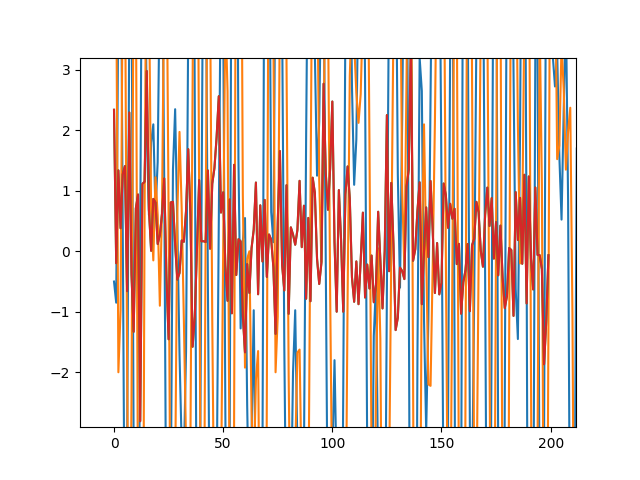

In [6]:
%matplotlib notebook
import numpy as np
import os
from tqdm import tnrange
from tqdm.auto import tqdm
import gc
import matplotlib.pylab as plt
import random

fixed_trace_array = np.load(r"D:\DCPA\trace\TVLA\Fixed_part0.npy",allow_pickle=True)
random_trace_array = np.load(r"D:\DCPA\trace\TVLA\Random_part0.npy",allow_pickle=True)

plt.plot(fixed_trace_array[0])
plt.plot(random_trace_array[0])

In [7]:
def tvla(trace1,trace2):
    n1 = trace1.shape[1]
    n2 = trace2.shape[1]
    
    mean1 = np.mean(trace1, axis = 1)
    mean2 = np.mean(trace2, axis = 1)
    
    var_trace1 = np.var(trace1, axis = 1)
    var_trace2 = np.var(trace2, axis = 1)
    
    t_val = (mean1 - mean2) / np.sqrt((var_trace1/n1) + (var_trace2/n2))
    
    return t_val

<IPython.core.display.Javascript object>


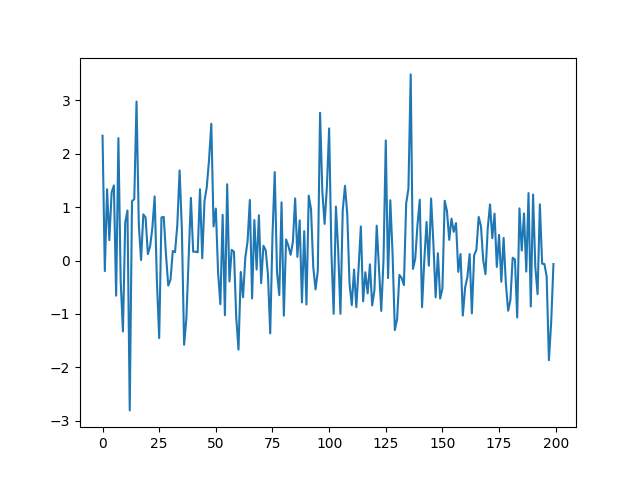

In [14]:
t_value = tvla(fixed_trace_array,random_trace_array)
plt.figure()
plt.plot(t_value)

<IPython.core.display.Javascript object>


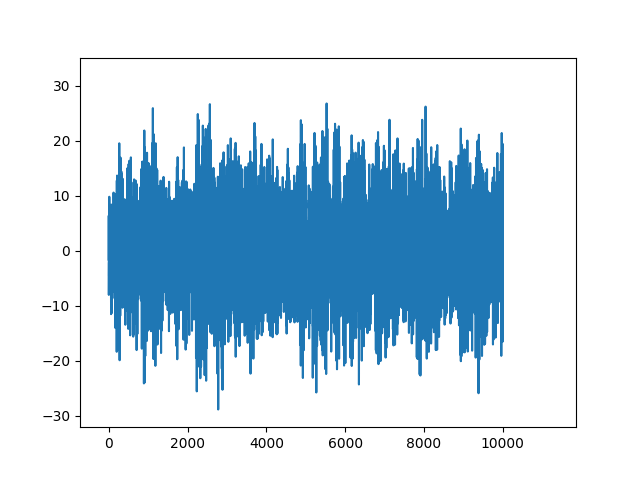

In [15]:
from scipy.stats import ttest_ind
t_val = ttest_ind(fixed_trace_array,random_trace_array, axis=0, equal_var=False)[0]
plt.figure()
plt.plot(t_val)